In [1]:
import os
import h5py
import json
import numpy as np
import sys
import glob
import typing
import copy
from typing import List, Dict, Union
import matplotlib.pyplot as plt
import pickle as pkl
from pathlib import Path
import random
import math
% matplotlib inline
sys.path.append("../") # Append visdialch path

UsageError: Line magic function `%` not found.


In [ ]:
sys.path.append("../") # Append visdialch path

In [2]:
path_val_data = "../../data/visdial_1.0_val.json"
path_images_root = "../../data/images/"
dense_annotations_jsonpath = "../../data/visdial_1.0_val_dense_annotations.json"
path_visdial_val = os.path.join(path_images_root, "VisualDialog_val2018")
model_preds_root = "../../final_logs_models"

In [3]:
def get_img_folder_list(path_images_root = "../../data/images"):
    path_visdial_val = os.path.join(path_images_root, "VisualDialog_val2018")
    img_folder_list = glob.glob(os.path.join(path_visdial_val, '*'))
    print(len(img_folder_list))
    return img_folder_list

img_folder_list = get_img_folder_list(path_images_root)

2064


In [4]:
img_name_list = [x.split("/")[-1] for x in img_folder_list]
print(len(img_name_list))

2064


In [5]:
def image_id_from_path(image_path):
    """Given a path to an image, return its id.

    Parameters
    ----------
    image_path : str
        Path to image, e.g.: coco_train2014/COCO_train2014/000000123456.jpg
        img_name = "VisualDialog_val2018_000000254080.jpg"
    Returns
    -------
    int
        Corresponding image id (123456)
    """

    return int(image_path.split("/")[-1][-16:-4])

def get_img_map(img_folder_list):
    img_map = dict()
    for img_path in img_folder_list:
        img_id = image_id_from_path(img_path)
        img_map[img_id] = img_path
    return img_map

def pkl_load(file_path):
    with open(file_path, "rb") as fb:
        data = pkl.load(fb)
    return data

def json_load(file_path):
    with open(file_path, "r") as fb:
        data = json.load(fb)
    return data

def show_img(img_id):
    img_map = get_img_map(img_folder_list)
    img_path = img_map[img_id]
    print("Reading image from: ", img_path)
#     plt.imshow(plt.imread(img_path))
    fig = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
    ax = fig.add_subplot(111)
    ax.imshow(plt.imread(img_path), interpolation='none')
#     ax.set_title('larger figure')
    plt.show()

    
def convert_list_json_dic(list_json):
    image_json_dic = {}
    for i in range(len(list_json)):
        image_json_dic[list_json[i]["image_id"]] = list_json[i]
    return image_json_dic



In [6]:
def get_visdial_image_map(img_name_list, img_id_list):
    assert len(img_id_list) == len(img_name_list)
    visdial_img_map = {}
    for indx in range(len(img_id_list)):
        visdial_img_map[img_id_list[indx]] = img_name_list[indx]
    return visdial_img_map
    
img_id_list = [image_id_from_path(x) for x in img_name_list]
print(len(img_id_list))

visdial_image_map = get_visdial_image_map(img_name_list, img_id_list)

2064


In [7]:
data_val = json.load(open(path_val_data))
dialogs = data_val['data']['dialogs']

dialogs = convert_list_json_dic(dialogs)

questions = data_val['data']['questions']
len(questions)

answers = data_val['data']['answers']
len(answers)

annotations_json = json.load(open(dense_annotations_jsonpath))

img_id_annotation_list = []
visdial_image_name_annotation_list = []
ques_annotation_list = []
round_annotation_list = []
img_ques_annotation_dic = []

macs_prefix = "http://www2.macs.hw.ac.uk/~sa201/data/VisualDialog_val2018/"

for index in range(len(annotations_json)):
    dense_annotations = annotations_json[index]
    gt_round_id = dense_annotations["round_id"]  # 1-index
    gt_image_id = dense_annotations["image_id"]
    gt_relevance = dense_annotations["gt_relevance"]
    dialog_instance = dialogs[gt_image_id]
    print(dialog_instance)
    round_question = questions[dialog_instance['dialog'][gt_round_id-1]['question']] # 0-index
    visdial_image_name = visdial_image_map[gt_image_id]
    
    img_url = "{}/{}".format(macs_prefix, visdial_image_name)
    img_ques_dic = {
        "image_id": gt_image_id,
        "question": round_question,
        "image_file_name": visdial_image_name,
        "img_url": img_url
    }
    
    visdial_image_name_annotation_list.append(visdial_image_name)
    img_id_annotation_list.append(gt_image_id)
    ques_annotation_list.append(round_question)
    round_annotation_list.append(gt_round_id-1) # Saving in 0-index
    img_ques_annotation_dic.append(img_ques_dic)   

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
print(ques_annotation_list[:4])

['is it a flat screen', 'does she have a collection bucket', 'does the bathroom appear to be nice', 'how old does the woman look']


In [9]:
print(visdial_image_name_annotation_list[:4])

['VisualDialog_val2018_000000185565.jpg', 'VisualDialog_val2018_000000284024.jpg', 'VisualDialog_val2018_000000574189.jpg', 'VisualDialog_val2018_000000148816.jpg']


In [10]:
img_macs_url = ["{}/{}".format(macs_prefix, x) for x in visdial_image_name_annotation_list]

print(img_macs_url[:4])

['http://www2.macs.hw.ac.uk/~sa201/data/VisualDialog_val2018//VisualDialog_val2018_000000185565.jpg', 'http://www2.macs.hw.ac.uk/~sa201/data/VisualDialog_val2018//VisualDialog_val2018_000000284024.jpg', 'http://www2.macs.hw.ac.uk/~sa201/data/VisualDialog_val2018//VisualDialog_val2018_000000574189.jpg', 'http://www2.macs.hw.ac.uk/~sa201/data/VisualDialog_val2018//VisualDialog_val2018_000000148816.jpg']


In [11]:
# Choose default examples to be shown for verification
# 67272 # 36690 # 52071
# default_examples_correctly_img_id = [67272, 36690, 52071, 129947, 566211] 
# default_example_hist_info_img_id = [239030, 225491, 162655, 209271, 560666]

# Can be correctly answered without any context
default_examples_correctly_img_id = [36690] 
# Need historical info to answer
default_example_hist_info_img_id = [162655]
amt_examples_list = []
default_examples_correctly_list = []
default_examples_hist_info_list = []

for i in range(len(img_ques_annotation_dic)):
    if img_ques_annotation_dic[i]['image_id'] in default_examples_correctly_img_id:
        default_examples_correctly_list.append(img_ques_annotation_dic[i])
    elif img_ques_annotation_dic[i]['image_id'] in default_example_hist_info_img_id:
        default_examples_hist_info_list.append(img_ques_annotation_dic[i])
    else:
        amt_examples_list.append(img_ques_annotation_dic[i])
        
print(len(amt_examples_list))
print(len(default_examples_correctly_list))
print(len(default_examples_hist_info_list))

2062
1
1


In [15]:
def write_in_chunks_list(amt_examples_list, default_examples_hist_info_list, default_examples_correctly_list, num_default_examples=0, num_examples_per_row=15, num_batches=10):
    # num_examples_per_row + num_default_examples == 15 (shown to the user)
    total_examples = len(amt_examples_list)
    print("Total examples to annotate:", total_examples)
    num_examples_per_task = math.ceil(total_examples/(num_batches*num_examples_per_row))
    print("Hits per task: ", num_examples_per_task)
    index=0
    for batch in range(num_batches):
#         batch_list = []
        chunk_annotation_file_path = "../../data/crowdsource/dense_image_id_ques_batch_{}.txt".format(batch+1)
        outfile = open(chunk_annotation_file_path, 'w')
        for example in range(num_examples_per_task):
            new_index = index+num_examples_per_row
            # Last batch 
            if new_index > total_examples:
                # Select till last                
                last_list = amt_examples_list[index:total_examples]
                # Start from beginning
                start_examples = num_examples_per_row - (total_examples - index)
                # print(new_index, index) 2072, 2058
                # print(start_examples) 10
                from_start_list = amt_examples_list[:start_examples]
                new_index = start_examples
                amt_chunk_list = last_list + from_start_list
                # print(len(amt_chunk_list))  should be 14
            else:
                amt_chunk_list = amt_examples_list[index:new_index]
#             default_example = random.choice(default_examples_hist_info_list)
#             amt_chunk_list.insert(0, default_example)
#             default_example = random.choice(default_examples_correctly_list)
#             amt_chunk_list.insert(0, default_example)            
            # print(len(amt_chunk_list))
            amt_line = json.dumps(amt_chunk_list)
            index = new_index # Update index
            outfile.write(amt_line + "\n")       
        outfile.close()            
    
write_in_chunks_list(amt_examples_list, default_examples_hist_info_list, default_examples_correctly_list)

Total examples to annotate: 2062
Hits per task:  14


In [ ]:
### When we have default examples as well

# def write_in_chunks_list(amt_examples_list, default_examples_hist_info_list, default_examples_correctly_list, num_default_examples=2, num_examples_per_row=13, num_batches=10):
#     # num_examples_per_row + num_default_examples == 15 (shown to the user)
#     total_examples = len(amt_examples_list)
#     print("Total examples to annotate:", total_examples)
#     num_examples_per_task = math.ceil(total_examples/(num_batches*num_examples_per_row))
#     print("Examples per task: ", num_examples_per_task)
#     index=0
#     for batch in range(num_batches):
# #         batch_list = []
#         chunk_annotation_file_path = "/scratch/shubham/visdial2019/data/crowdsource/dense_image_id_ques_batch_{}.txt".format(batch+1)
#         outfile = open(chunk_annotation_file_path, 'w')
#         for example in range(num_examples_per_task):
#             new_index = index+num_examples_per_row
#             # Last batch 
#             if new_index > total_examples:
#                 # Select till last                
#                 last_list = amt_examples_list[index:total_examples]
#                 # Start from beginning
#                 start_examples = num_examples_per_row - (total_examples - index)
#                 # print(new_index, index) 2072, 2058
#                 # print(start_examples) 10
#                 from_start_list = amt_examples_list[:start_examples]
#                 new_index = start_examples
#                 amt_chunk_list = last_list + from_start_list
#                 # print(len(amt_chunk_list))  should be 14
#             else:
#                 amt_chunk_list = amt_examples_list[index:new_index]
#             default_example = random.choice(default_examples_hist_info_list)
#             amt_chunk_list.insert(0, default_example)
#             default_example = random.choice(default_examples_correctly_list)
#             amt_chunk_list.insert(0, default_example)            
#             # print(len(amt_chunk_list))
#             amt_line = json.dumps(amt_chunk_list)
# #             batch_list.append(amt_line)
#             index = new_index # Update index
#             outfile.write(amt_line + "\n")       
#         outfile.close()            
    
# write_in_chunks_list(amt_examples_list, default_examples_hist_info_list, default_examples_correctly_list)

Calculation : 13 * 16 * 10 = 2080

Repeated examples: ??

Calculation : 13 * 16 * 10 = 2080

Repeated examples: 26 --> last 2 lines

# Chunking

In [14]:
    ## Last batch
#     batch += 1
#     num_examples_last_task = (total_examples-index)/num_examples_per_row
#     chunk_annotation_file_path = "/scratch/shubham/visdial2019/data/crowdsource/dense_image_id_ques_batch_{}.txt".format(batch+1)
#     outfile = open(chunk_annotation_file_path, 'w')
#     for example in range(num_examples_per_task):
#         new_index = index+num_examples_per_row
#         amt_chunk_list = amt_examples_list[index:new_index]
#         default_example = random.choice(default_examples_list)
#         amt_chunk_list.insert(0, default_example)
#         # print(len(amt_chunk_list))
#         amt_line = json.dumps(amt_chunk_list)
#         batch_list.append(amt_line)
#         index = new_index # Update index
#         outfile.write(amt_line + "\n")

#     outfile.close()            


In [15]:
#     chunks = np.array_split(np.array(write_list), num_chunks)
#     for index in range(len(chunks)):
#         chunk_annotation_file_path = "/scratch/shubham/visdial2019/data/crowdsource/dense_image_id_ques_batch_{}.json".format(index+1)
#         with open(chunk_annotation_file_path, 'w') as outfile:
#             json.dump(chunks[index].tolist(), outfile)     


### Verification


369360
Reading image from:  /scratch/shubham/visdial2019/data/images/VisualDialog_val2018/VisualDialog_val2018_000000369360.jpg


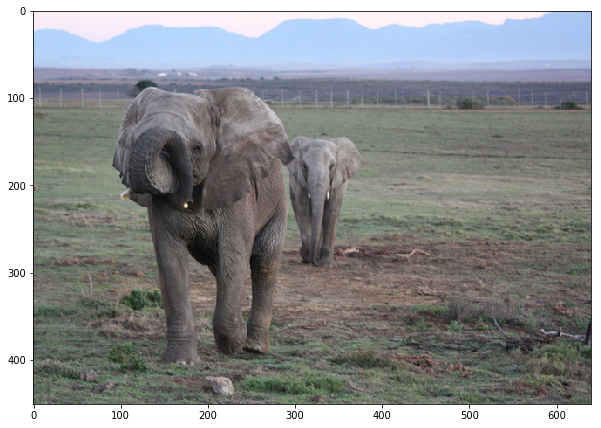

are both elephants large


In [12]:
# By index
i = 173
print(img_ques_annotation_dic[i]['image_id'])
show_img(img_ques_annotation_dic[i]['image_id'])
print(img_ques_annotation_dic[i]['question'])

In [13]:
# By image id
# Convert list to dic
img_ques_dic = convert_list_json_dic(img_ques_annotation_dic)

111013
Reading image from:  /scratch/shubham/visdial2019/data/images/VisualDialog_val2018/VisualDialog_val2018_000000111013.jpg


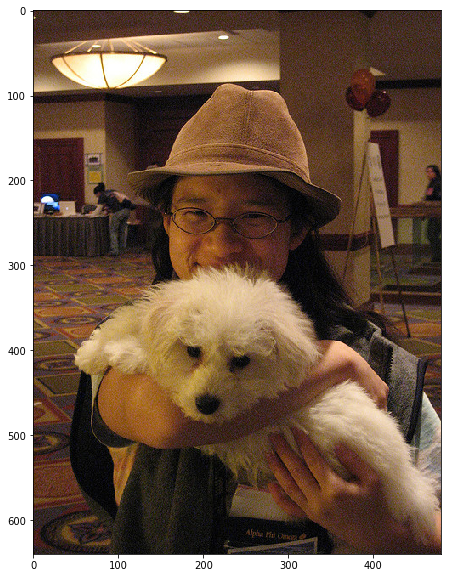

what else is the man wearing


In [16]:
# default_examples_correctly_img_id = [67272, 36690, 52071, 129947, 566211] 
# default_example_hist_info_img_id = [239030, 225491, 162655, 209271, 560666]

# new_default 36690
# new_default 162655

i = 111013
print(img_ques_dic[i]['image_id'])
show_img(img_ques_dic[i]['image_id'])
print(img_ques_dic[i]['question'])